In [94]:
import os
import re
import seaborn as sns
#import tensorflow
import pandas as pd
import numpy
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12,4.8
import math
from sklearn.preprocessing import MinMaxScaler
#15, 6
import matplotlib.pyplot as plt
import time
#import statsmodels
#from statsmodels.tsa.stattools import adfuller
#import statsmodels.api as sm
import scipy
from sklearn.externals import joblib
from sklearn import preprocessing
from sklearn import metrics
import matplotlib.ticker as ticker

In [8]:
counters = pd.read_csv('/home/webadmin/ca_counters.csv',delimiter=';')

In [15]:
counters

,datetime,Period,NE Name,Cell,L.ChMeas.PDSCH.DL.256QAM.MCS.0 (None),L.ChMeas.PDSCH.DL.256QAM.MCS.1 (None),L.ChMeas.PDSCH.DL.256QAM.MCS.10 (None),L.ChMeas.PDSCH.DL.256QAM.MCS.11 (None),L.ChMeas.PDSCH.DL.256QAM.MCS.12 (None),L.ChMeas.PDSCH.DL.256QAM.MCS.13 (None),...,L.CA.PCell.Traffic.DL.SCH.256QAM.ErrTB.Ibler (None),L.CA.PCell.Traffic.DL.SCH.16QAM.TB (None),L.CA.PCell.Traffic.DL.SCH.256QAM.ErrTB.Rbler (None),L.CA.PCell.Traffic.DL.SCH.64QAM.TB (None),L.CA.PCell.Traffic.DL.SCH.256QAM.TB (None),L.CA.PCell.Traffic.DL.SCH.QPSK.TB (None),L.CA.SCell.Traffic.DL.SCH.16QAM.TB (None),L.CA.SCell.Traffic.DL.SCH.256QAM.TB (None),L.CA.SCell.Traffic.DL.SCH.64QAM.TB (None),L.CA.SCell.Traffic.DL.SCH.QPSK.TB (None)
0,12/04/2017 00:00:00 DST,60,EDFSQS19,"eNodeB Function Name=EDFSQS19, Local Cell ID=1...",0,0,0,0,0,0,...,0,0,0,0,0,23,335,0,0,1225
1,12/04/2017 00:00:00 DST,60,EDFSQS19,"eNodeB Function Name=EDFSQS19, Local Cell ID=9...",0,0,0,0,0,0,...,0,1525,0,12825,0,9867,11215,0,32074,12928
2,12/04/2017 00:00:00 DST,60,EDFSQS19,"eNodeB Function Name=EDFSQS19, Local Cell ID=8...",0,0,0,0,0,0,...,0,233,0,468,0,5270,13395,0,5872,14801
3,12/04/2017 00:00:00 DST,60,EDFSQS19,"eNodeB Function Name=EDFSQS19, Local Cell ID=1...",5557,972,11262,13352,13476,14844,...,0,2341,0,1551,0,19155,5092,0,1407,5192
4,12/04/2017 00:00:00 DST,60,EDFSQS19,"eNodeB Function Name=EDFSQS19, Local Cell ID=1...",10,5,207,619,261,435,...,0,1839,0,19278,0,12538,18452,0,29752,6423
5,12/04/2017 00:00:00 DST,60,EDFSQS19,"eNodeB Function Name=EDFSQS19, Local Cell ID=1...",251,81,8,4,3,3,...,0,6413,0,13215,0,18224,6900,0,22776,3228
6,12/04/2017 00:00:00 DST,60,EDFSQS19,"eNodeB Function Name=EDFSQS19, Local Cell ID=0...",0,0,0,0,0,0,...,0,45855,0,26963,0,62008,835,0,326,976
7,12/04/2017 00:00:00 DST,60,EDFSQS19,"eNodeB Function Name=EDFSQS19, Local Cell ID=1...",2345,1473,5501,2804,1189,478,...,59,116037,0,112040,146,89420,1329,0,8480,902
8,12/04/2017 00:00:00 DST,60,EDFSQS19,"eNodeB Function Name=EDFSQS19, Local Cell ID=2...",0,0,0,0,0,0,...,0,12532,0,21066,0,22656,0,0,0,0
9,12/04/2017 01:00:00 DST,60,EDFSQS19,"eNodeB Function Name=EDFSQS19, Local Cell ID=1...",0,0,0,0,0,0,...,0,0,0,0,0,0,4,0,0,0


In [22]:
def get_cell_name(column):
    return column.split(',')[2].split('=')[1]

In [23]:
counters['cellname'] = counters['Cell'].apply(get_cell_name)

In [24]:
counters

,datetime,Period,NE Name,Cell,L.ChMeas.PDSCH.DL.256QAM.MCS.0 (None),L.ChMeas.PDSCH.DL.256QAM.MCS.1 (None),L.ChMeas.PDSCH.DL.256QAM.MCS.10 (None),L.ChMeas.PDSCH.DL.256QAM.MCS.11 (None),L.ChMeas.PDSCH.DL.256QAM.MCS.12 (None),L.ChMeas.PDSCH.DL.256QAM.MCS.13 (None),...,L.CA.PCell.Traffic.DL.SCH.16QAM.TB (None),L.CA.PCell.Traffic.DL.SCH.256QAM.ErrTB.Rbler (None),L.CA.PCell.Traffic.DL.SCH.64QAM.TB (None),L.CA.PCell.Traffic.DL.SCH.256QAM.TB (None),L.CA.PCell.Traffic.DL.SCH.QPSK.TB (None),L.CA.SCell.Traffic.DL.SCH.16QAM.TB (None),L.CA.SCell.Traffic.DL.SCH.256QAM.TB (None),L.CA.SCell.Traffic.DL.SCH.64QAM.TB (None),L.CA.SCell.Traffic.DL.SCH.QPSK.TB (None),cellname
0,12/04/2017 00:00:00 DST,60,EDFSQS19,"eNodeB Function Name=EDFSQS19, Local Cell ID=1...",0,0,0,0,0,0,...,0,0,0,0,23,335,0,0,1225,EDFSQS19K
1,12/04/2017 00:00:00 DST,60,EDFSQS19,"eNodeB Function Name=EDFSQS19, Local Cell ID=9...",0,0,0,0,0,0,...,1525,0,12825,0,9867,11215,0,32074,12928,EDFSQS19J
2,12/04/2017 00:00:00 DST,60,EDFSQS19,"eNodeB Function Name=EDFSQS19, Local Cell ID=8...",0,0,0,0,0,0,...,233,0,468,0,5270,13395,0,5872,14801,EDFSQS19I
3,12/04/2017 00:00:00 DST,60,EDFSQS19,"eNodeB Function Name=EDFSQS19, Local Cell ID=1...",5557,972,11262,13352,13476,14844,...,2341,0,1551,0,19155,5092,0,1407,5192,EDFSQS19O
4,12/04/2017 00:00:00 DST,60,EDFSQS19,"eNodeB Function Name=EDFSQS19, Local Cell ID=1...",10,5,207,619,261,435,...,1839,0,19278,0,12538,18452,0,29752,6423,EDFSQS19N
5,12/04/2017 00:00:00 DST,60,EDFSQS19,"eNodeB Function Name=EDFSQS19, Local Cell ID=1...",251,81,8,4,3,3,...,6413,0,13215,0,18224,6900,0,22776,3228,EDFSQS19M
6,12/04/2017 00:00:00 DST,60,EDFSQS19,"eNodeB Function Name=EDFSQS19, Local Cell ID=0...",0,0,0,0,0,0,...,45855,0,26963,0,62008,835,0,326,976,EDFSQS19A
7,12/04/2017 00:00:00 DST,60,EDFSQS19,"eNodeB Function Name=EDFSQS19, Local Cell ID=1...",2345,1473,5501,2804,1189,478,...,116037,0,112040,146,89420,1329,0,8480,902,EDFSQS19B
8,12/04/2017 00:00:00 DST,60,EDFSQS19,"eNodeB Function Name=EDFSQS19, Local Cell ID=2...",0,0,0,0,0,0,...,12532,0,21066,0,22656,0,0,0,0,EDFSQS19C
9,12/04/2017 01:00:00 DST,60,EDFSQS19,"eNodeB Function Name=EDFSQS19, Local Cell ID=1...",0,0,0,0,0,0,...,0,0,0,0,0,4,0,0,0,EDFSQS19K


In [93]:
sorted(list(counters.columns.values))

['Cell',
 'L.CA.DL.PCell.3CC.Act.Dur (ms)',
 'L.CA.DL.PCell.Act.Dur (ms)',
 'L.CA.DL.SCell.Act.Dur (ms)',
 'L.CA.PCell.Traffic.DL.SCH.16QAM.TB (None)',
 'L.CA.PCell.Traffic.DL.SCH.256QAM.ErrTB.Ibler (None)',
 'L.CA.PCell.Traffic.DL.SCH.256QAM.ErrTB.Rbler (None)',
 'L.CA.PCell.Traffic.DL.SCH.256QAM.TB (None)',
 'L.CA.PCell.Traffic.DL.SCH.64QAM.TB (None)',
 'L.CA.PCell.Traffic.DL.SCH.QPSK.TB (None)',
 'L.CA.SCell.Traffic.DL.SCH.16QAM.TB (None)',
 'L.CA.SCell.Traffic.DL.SCH.256QAM.TB (None)',
 'L.CA.SCell.Traffic.DL.SCH.64QAM.TB (None)',
 'L.CA.SCell.Traffic.DL.SCH.QPSK.TB (None)',
 'L.CA.Traffic.bits.DL.PCell (bit)',
 'L.CA.Traffic.bits.DL.SCell (bit)',
 'L.ChMeas.CQI.DL.0 (None)',
 'L.ChMeas.CQI.DL.1 (None)',
 'L.ChMeas.CQI.DL.10 (None)',
 'L.ChMeas.CQI.DL.11 (None)',
 'L.ChMeas.CQI.DL.12 (None)',
 'L.ChMeas.CQI.DL.13 (None)',
 'L.ChMeas.CQI.DL.14 (None)',
 'L.ChMeas.CQI.DL.15 (None)',
 'L.ChMeas.CQI.DL.2 (None)',
 'L.ChMeas.CQI.DL.3 (None)',
 'L.ChMeas.CQI.DL.4 (None)',
 'L.ChMeas.CQI.

In [21]:
counters['Cell'][0]#.apply(get_cell_name)

'eNodeB Function Name=EDFSQS19, Local Cell ID=10, Cell Name=EDFSQS19K, eNodeB ID=610178, Cell FDD TDD indication=CELL_FDD'

In [62]:
EDFSQS19A = counters.loc[counters['cellname'] == 'EDFSQS19A']#.values

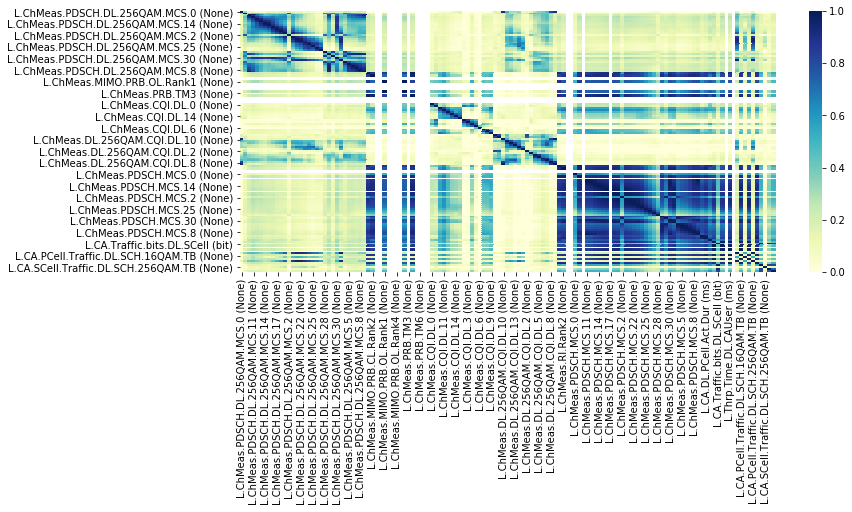

In [89]:
sb.heatmap(teste, cmap = 'YlGnBu', vmin = 0, vmax = 1)

In [88]:
teste=EDFSQS19A.drop(['Period', 'datetime', 'NE Name', 'Cell', 'cellname'],1).corr()#.dropna(axis=0, how='any')
#sns.clustermap(EDFSQS19A.corr().drop('Period',1),center=0, cmap="vlag")

In [32]:
np_counters = counters.values

In [36]:
np_counters[:,0]

(4914,)

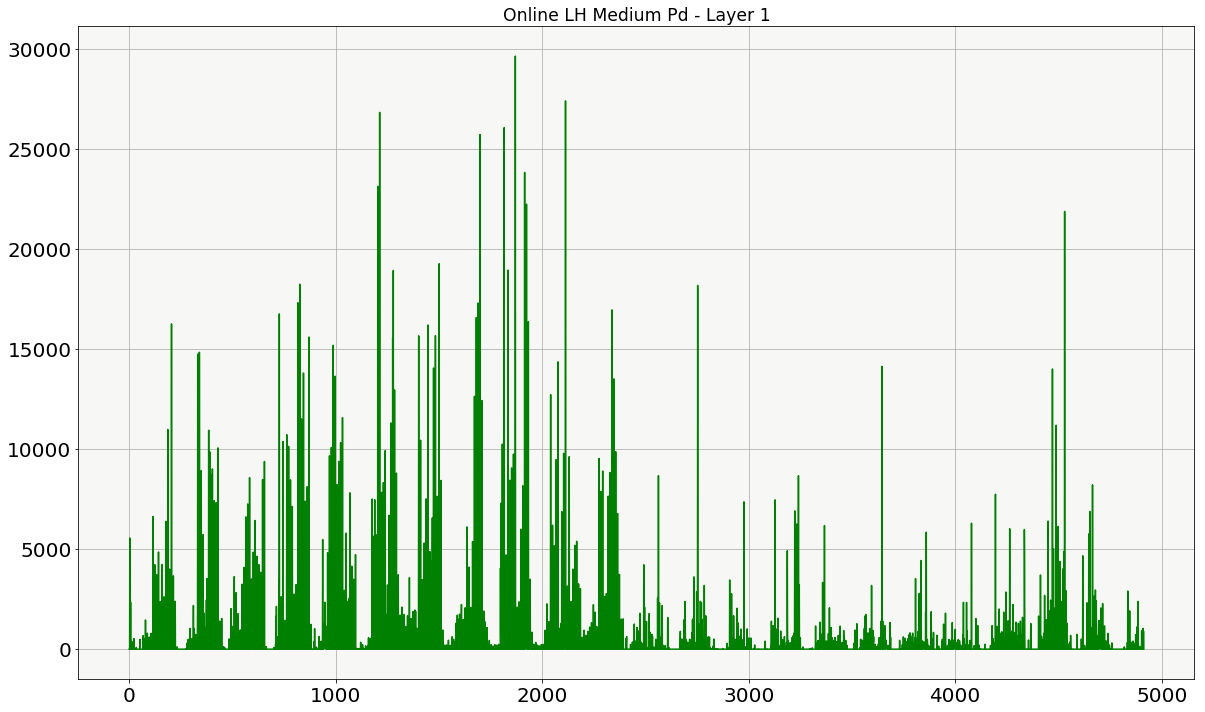

In [58]:
fig, ax1 = plt.subplots(figsize=(20, 12))
ax1.set_facecolor('#f7f7f5')
#ax2 = ax1.twinx()
#ax1.errorbar(neurons, y=pd, yerr=stdpd,color='g')
#ax1.errorbar(neurons, y=sp, yerr=stdsp,color='y')
#ax1.set_xlabel('time (s)')
#ax1.set_ylabel('exp')
#ax2.errorbar(neurons, y=pf, yerr=stdpf)
#ax2.set_ylabel('sin')

plt.title('Online LH Medium Pd - Layer 1',fontsize= 'xx-large')
#ax1.set_ylabel('Pd,SP',fontsize=20)
#ax2.set_ylabel('Pf',fontsize=20)
#ax1.set_xlabel('Neurons on Hidden Layer 1',fontsize=20)
ax1.tick_params(axis='both',labelsize=20)
#ax2.tick_params(axis='both',labelsize=20)
ax1.plot(np_counters[:,4],'g')
#ax1.legend(['Ref Pd','Pd','SP'], loc='best',fontsize = 'xx-large')
#ax2.legend(['Pf'], loc='best',fontsize = 'xx-large')
axes = plt.gca()
ylim = axes.get_ylim()


#ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.5))

plt.grid()
#axes.set_ylim(ylim)
#plt.savefig(dirout+'40X20_kl_recons_anel.png')
plt.show()
#fig.savefig(dirout+'pd.png')